In [14]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# Cargar datos de Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar imágenes y convertir etiquetas a one-hot encoding
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)  # 10 clases en Fashion MNIST
y_test = to_categorical(y_test, 10)

# Redimensionar imágenes para que coincidan con el formato de entrada de la red neuronal
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Definir el modelo de red neuronal convolucional (CNN)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluar el modelo en el conjunto de prueba
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Guardar el modelo entrenado
model.save('fashion_mnist_model.h5')


Epoch 1/10
938/938 [==============================] - 51s 48ms/step - loss: 0.5235 - accuracy: 0.8172 - val_loss: 0.3353 - val_accuracy: 0.8772
Epoch 2/10
938/938 [==============================] - 35s 37ms/step - loss: 0.3512 - accuracy: 0.8760 - val_loss: 0.2970 - val_accuracy: 0.8931
Epoch 3/10
938/938 [==============================] - 36s 38ms/step - loss: 0.3113 - accuracy: 0.8887 - val_loss: 0.2808 - val_accuracy: 0.8964
Epoch 4/10
938/938 [==============================] - 32s 34ms/step - loss: 0.2816 - accuracy: 0.8982 - val_loss: 0.2601 - val_accuracy: 0.9034
Epoch 5/10
938/938 [==============================] - 35s 37ms/step - loss: 0.2641 - accuracy: 0.9036 - val_loss: 0.2539 - val_accuracy: 0.9070
Epoch 6/10
938/938 [==============================] - 41s 43ms/step - loss: 0.2506 - accuracy: 0.9090 - val_loss: 0.2523 - val_accuracy: 0.9091
Epoch 7/10
938/938 [==============================] - 33s 35ms/step - loss: 0.2341 - accuracy: 0.9128 - val_loss: 0.2512 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 62ms/step


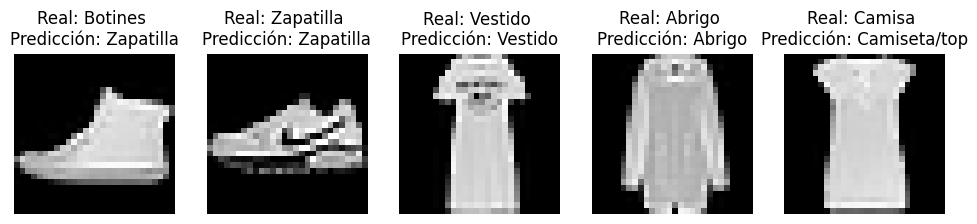

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar aleatoriamente algunas imágenes del conjunto de prueba
indices_aleatorios = np.random.choice(len(x_test), size=5, replace=False)
imagenes_a_predecir = x_test[indices_aleatorios]
etiquetas_reales = y_test[indices_aleatorios]

# Realizar predicciones
etiquetas_predichas = model.predict(imagenes_a_predecir)

# Mapear etiquetas de clase a nombres de prendas (puedes personalizar según tus necesidades)
nombres_clases = ["Camiseta/top", "Pantalón", "Jersey", "Vestido", "Abrigo", "Sandalia", "Camisa", "Zapatilla", "Bolso", "Botines"]

# Mostrar imágenes con etiquetas reales y predichas
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imagenes_a_predecir[i].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {nombres_clases[np.argmax(etiquetas_reales[i])]} \nPredicción: {nombres_clases[np.argmax(etiquetas_predichas[i])]}")
    plt.axis('off')

plt.show()


In [15]:
!pip install imageio


<ipython-input-40-763d485ea6f8>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen_original = imageio.imread(imagen_path)


1/1 [==============================] - 0s 73ms/step


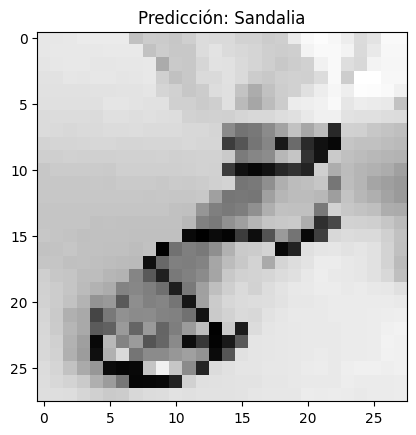

Text(0.5, 1.0, 'Predicción: Sandalia')

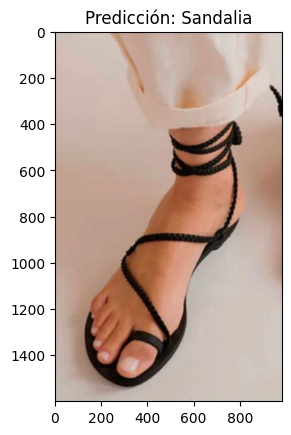

In [40]:
import imageio
import numpy as np
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt

# Cargar el modelo entrenado
model = load_model('fashion_mnist_model.h5')

# Cargar y preprocesar tus imágenes
# Asegúrate de que 'tu_imagen' sea reemplazado con la ruta a tu propia imagen
imagen_path = 'zapa 2.jpg'
imagen_original = imageio.imread(imagen_path)



# Preprocesar la imagen
imagen = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2GRAY)  # Convertir a escala de grises si es necesario
imagen = cv2.resize(imagen, (28, 28))
imagen = imagen / 255.0  # Normalizar

# Reshape la imagen para que coincida con el formato de entrada del modelo
imagen = imagen.reshape(1, 28, 28, 1)

# Hacer predicciones
prediccion = model.predict(imagen)
etiqueta_predicha = np.argmax(prediccion)

# Mapear la etiqueta predicha a la clase correspondiente (si tienes un diccionario de clases)
clases = {0: 'Camiseta', 1: 'Pantalón', 2: 'Jersey', 3: 'Vestido', 4: 'Abrigo', 5: 'Sandalia', 6: 'Camisa', 7: 'Zapatilla', 8: 'Botines'}
nombre_clase_predicha = clases[etiqueta_predicha]

# Visualizar la imagen preprocesada con la predicción
plt.imshow(imagen.reshape(28, 28), cmap='gray')
plt.title(f'Predicción: {nombre_clase_predicha}')
plt.show()
plt.imshow(imagen_original)
plt.title(f'Predicción: {nombre_clase_predicha}')